In [1]:
import zarrdataset as zds
import zarr

C:\Users\cervaf\Documents\Apps\miniconda3\envs\zds-dev\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# These are images from the Image Data Resource (IDR) 
# https://idr.openmicroscopy.org/ that are publicly available and were 
# converted to the OME-NGFF (Zarr) format by the OME group. More examples
# can be found at Public OME-Zarr data (Nov. 2020)
# https://www.openmicroscopy.org/2020/11/04/zarr-data.html

filenames = ["https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0073A/9798462.zarr"]

In [3]:
import random
import numpy as np

# For reproducibility
np.random.seed(478963)
random.seed(478965)

In [4]:
z_img = zarr.open(filenames[0], mode="r")
z_img["0"].info

Name,/0
Type,zarr.core.Array
Data type,uint8
Shape,"(1, 3, 1, 16433, 21115)"
Chunk shape,"(1, 1, 1, 1024, 1024)"
Order,C
Read-only,True
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.FSStore
No. bytes,1040948385 (992.7M)
Chunks initialized,0/1071


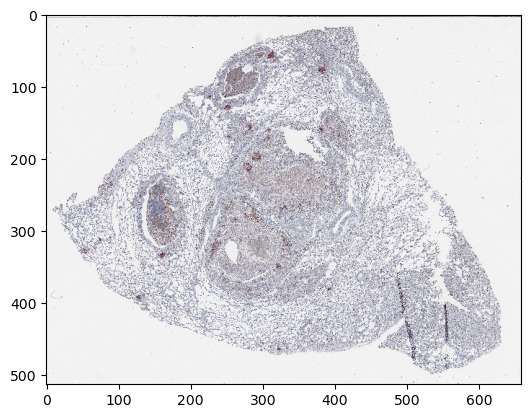

In [5]:
import matplotlib.pyplot as plt

plt.imshow(np.moveaxis(z_img["5"][0, :, 0], 0, -1))
plt.show()

In [6]:
my_dataset = zds.ZarrDataset()

In [7]:
my_dataset.add_modality(
  modality="image",
  filenames=filenames,
  source_axes="TCZYX",
  data_group="6"
)

In [8]:
ds_iterator = iter(my_dataset)
ds_iterator

<generator object ZarrDataset.__iter__ at 0x000001B5DBBD86D8>

In [9]:
sample = next(ds_iterator)

print(type(sample), sample.shape)

C:\Users\cervaf\Documents\Apps\miniconda3\envs\zds-dev\lib\site-packages\boto3\compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


<class 'numpy.ndarray'> (1, 3, 1, 256, 329)


In [10]:
z_img["6"].info

Name,/6
Type,zarr.core.Array
Data type,uint8
Shape,"(1, 3, 1, 256, 329)"
Chunk shape,"(1, 1, 1, 256, 329)"
Order,C
Read-only,True
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.FSStore
No. bytes,252672 (246.8K)
Chunks initialized,0/3


In [11]:
patch_size = dict(Y=512, X=512)
patch_sampler = zds.PatchSampler(patch_size=patch_size)

patch_sampler

<class 'zarrdataset._samplers.PatchSampler'> for sampling patches of size {'Z': 1, 'Y': 512, 'X': 512}.

In [12]:
my_dataset = zds.ZarrDataset(patch_sampler=patch_sampler)

my_dataset.add_modality(
  modality="image",
  filenames=filenames,
  source_axes="TCZYX",
  data_group="0"
)

my_dataset

ZarrDataset (PyTorch support:True, tqdm support :True)
Modalities: image
Transforms order: []
Using image modality as reference.
Using <class 'zarrdataset._samplers.PatchSampler'> for sampling patches of size {'Z': 1, 'Y': 512, 'X': 512}.

In [13]:
ds_iterator = iter(my_dataset)

sample = next(ds_iterator)
type(sample), sample.shape, sample.dtype

sample = next(ds_iterator)
type(sample), sample.shape, sample.dtype

sample = next(ds_iterator)
type(sample), sample.shape, sample.dtype

(numpy.ndarray, (1, 3, 1, 512, 512), dtype('uint8'))

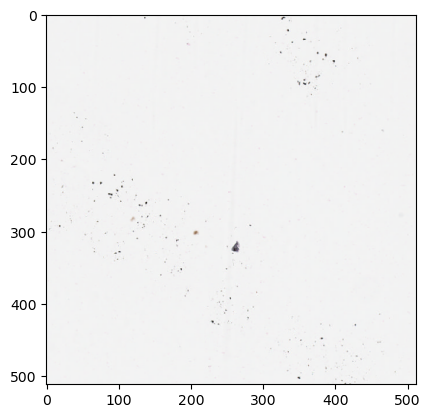

In [14]:
plt.imshow(np.moveaxis(sample[0, :, 0], 0, -1))
plt.show()

In [15]:
samples = []
for i, sample in enumerate(my_dataset):
    samples.append(np.moveaxis(sample[0, :, 0], 0, -1))

    if i >= 4:
        # Take only five samples for illustration purposes
        break

samples_stack = np.hstack(samples)

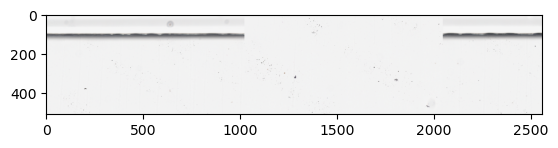

In [16]:
plt.imshow(samples_stack)
plt.show()

In [17]:
image_specs = zds.ImagesDatasetSpecs(
  filenames=filenames,
  data_group="0",
  source_axes="TCZYX",
)

In [18]:
my_dataset = zds.ZarrDataset(dataset_specs=[image_specs],
                             patch_sampler=patch_sampler,
                             shuffle=True)

In [19]:
samples = []
for i, sample in enumerate(my_dataset):
    samples.append(np.moveaxis(sample[0, :, 0], 0, -1))

    if i >= 4:
        # Take only five samples for illustration purposes
        break

samples_stack = np.hstack(samples)

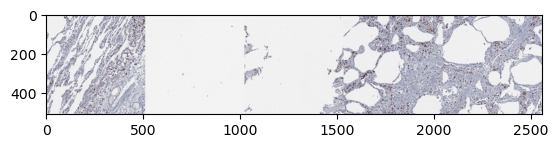

In [20]:
plt.imshow(samples_stack)
plt.show()